In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
# from keras.models import Sequential
# from keras.models import Model
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Input
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [2]:
def showGraph(data):
    plt.figure()
    plt.plot(data)
    plt.show()
def saveGraph(data, file_name):
    plt.figure(dpi=360)
    plt.plot(data)
    plt.savefig('results/' + file_name)
# convert dataset to x and y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
def relative_error(xs, ys):
    error = 0
    zero = 0
    for i in range(len(xs)):
        if ys[i] != 0:
            error += abs(xs[i]-ys[i])*100 / ys[i]
        else:
            zero += 1
    error /= (len(xs) - zero)
    return error

def read_data(file_name):
    return pandas.read_csv('datas/' + file_name, usecols=[1], sep='|')
def saveGraphWithDate(dates, y_axis, file_name, format_date):
    plt.figure(dpi=360)
    x = [dt.datetime.strptime(d,format_date).date() for d in dates]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.plot(x,y_axis)
    plt.gcf().autofmt_xdate()
    plt.savefig('results/' + file_name)

In [3]:
data = pandas.read_csv('results/lstm_vnindex3/result_lstm_trending.csv', sep='|')

In [35]:
# calculate root mean squared error
error = numpy.array([abs(a - b) for a, b in zip(data['close_price'], data['predict'])])
average = sum(error)/len(error)
print(average)

4.3828425859


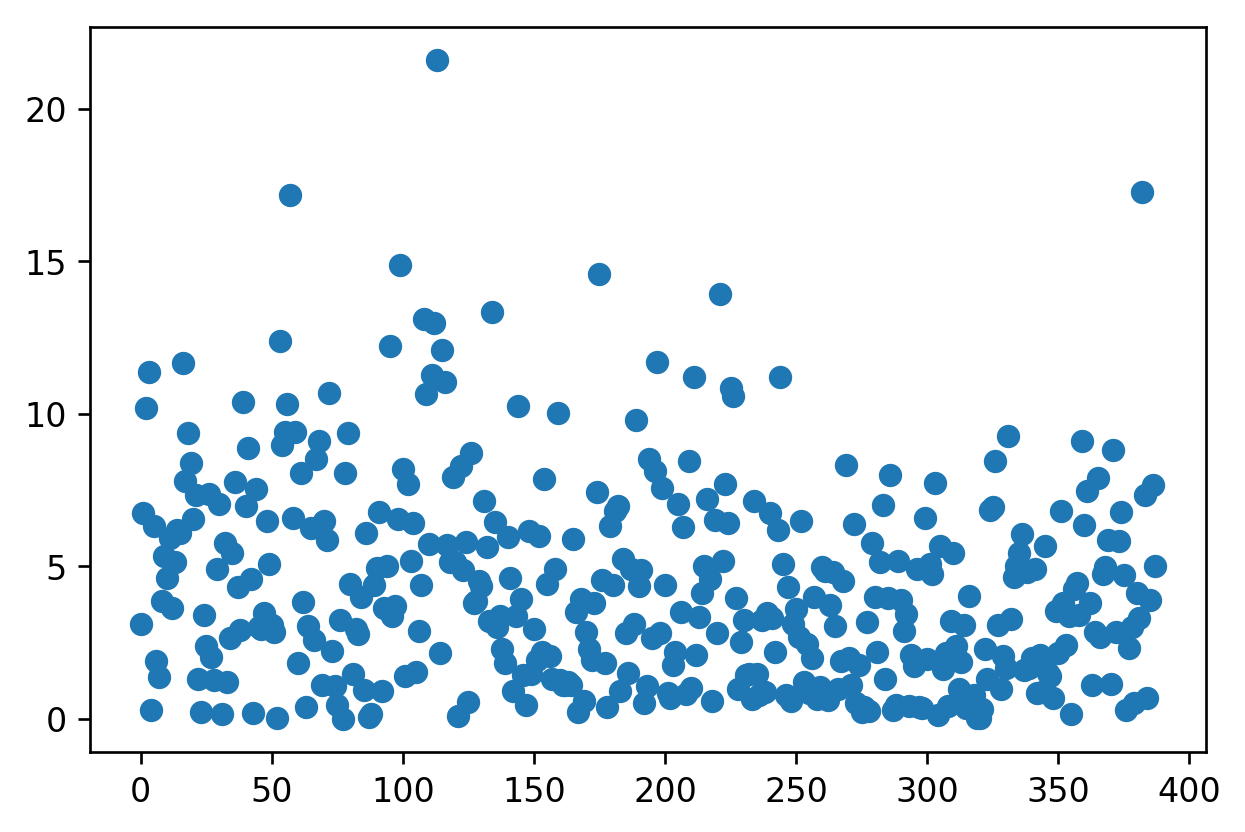

In [36]:
plt.figure(dpi=240)
plt.scatter(list(range(len(error))), error)
plt.show()

In [15]:
# two days
diff = [abs(a - b) for a, b in zip(data['close_price'][:-3], data['predict'][2:])]
average_diff = sum(diff)/len(diff)
print(average_diff)

6.04212586549


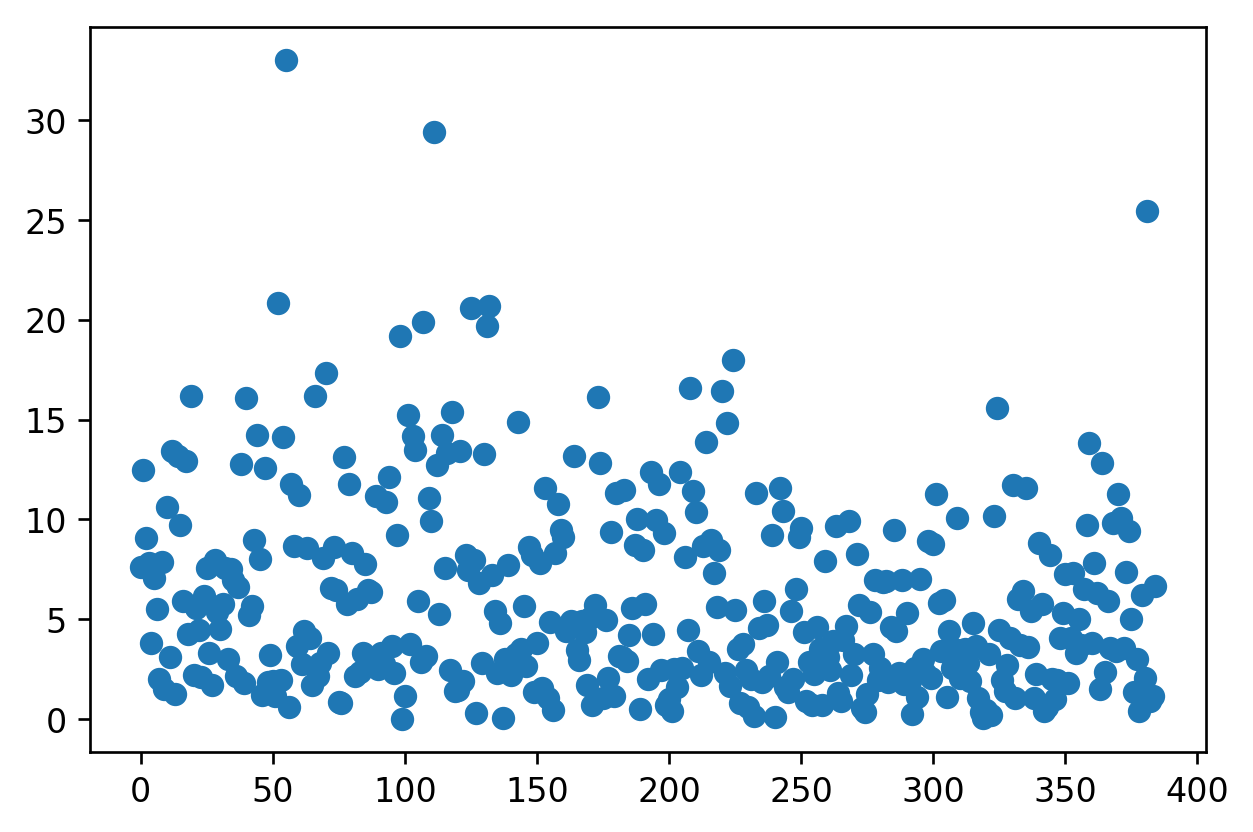

In [16]:
plt.figure(dpi=240)
plt.scatter(list(range(len(diff))), diff)
plt.show()

3.64235751295


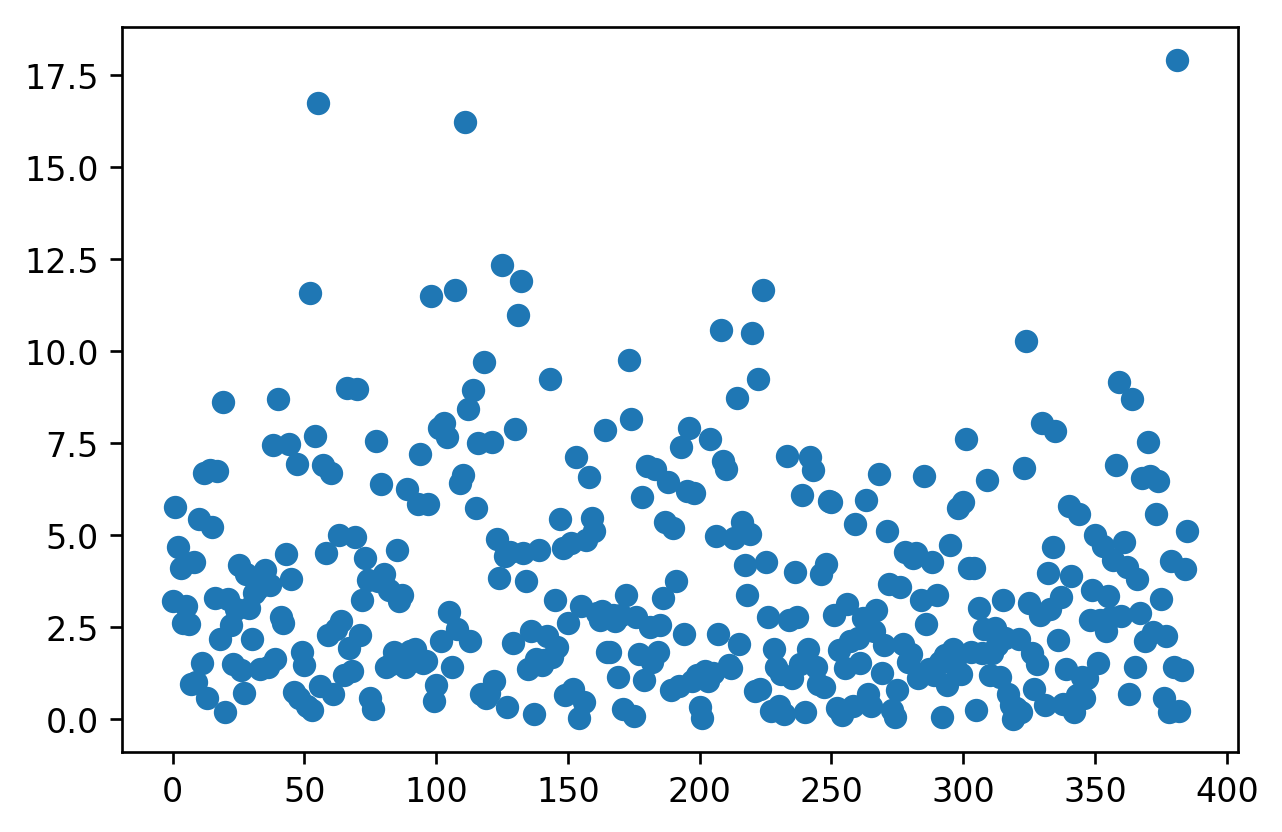

In [17]:
# continuous
diff_cont = [abs(a-b) for a, b in zip(data['close_price'][1:], data['close_price'][:-2])]
average_diff_cont = sum(diff_cont) / len(diff_cont)
print(average_diff_cont)
plt.figure(dpi=240)
plt.scatter(list(range(len(diff_cont))), diff_cont)
plt.show()

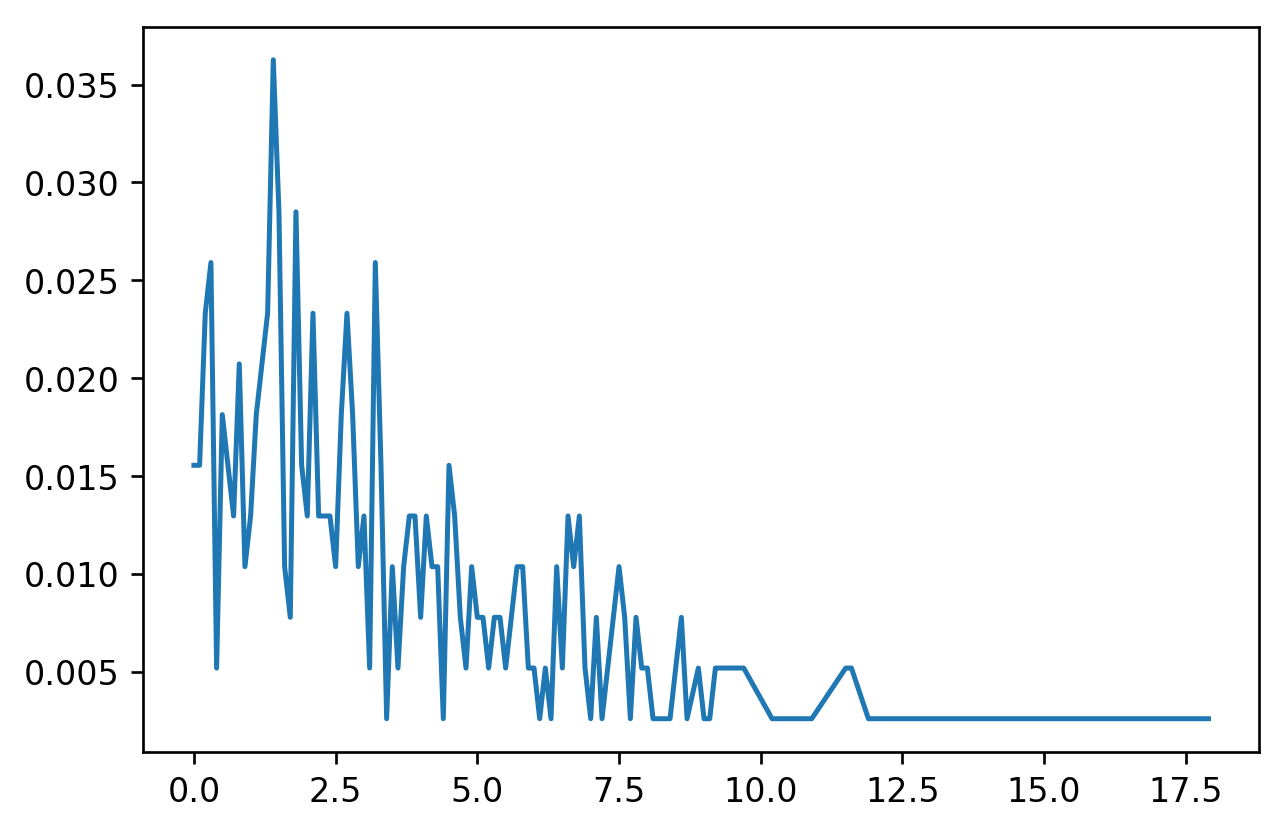

0.03626943005181347
1.4


In [56]:
# round diff continous | multiple by 10 and parse Int
round_diff_cont = [int(x*10) for x in diff_cont]
distribution_diff_cont = {}
for i in round_diff_cont:
    if i in distribution_diff_cont:
        distribution_diff_cont[i] += 1
    else:
        distribution_diff_cont[i] = 1
x_diff_cont = [key for key in distribution_diff_cont]
y_diff_cont = [distribution_diff_cont[key] for key in distribution_diff_cont]
x_diff_cont = [x/10 for x in x_diff_cont]
y_diff_cont = [y/sum(y_diff_cont) for y in y_diff_cont]
plt.figure(dpi=240)
plt.plot(x_diff_cont, y_diff_cont)
plt.show()

print(max(y_diff_cont))
print(x_diff_cont[y_diff_cont.index(max(y_diff_cont))])

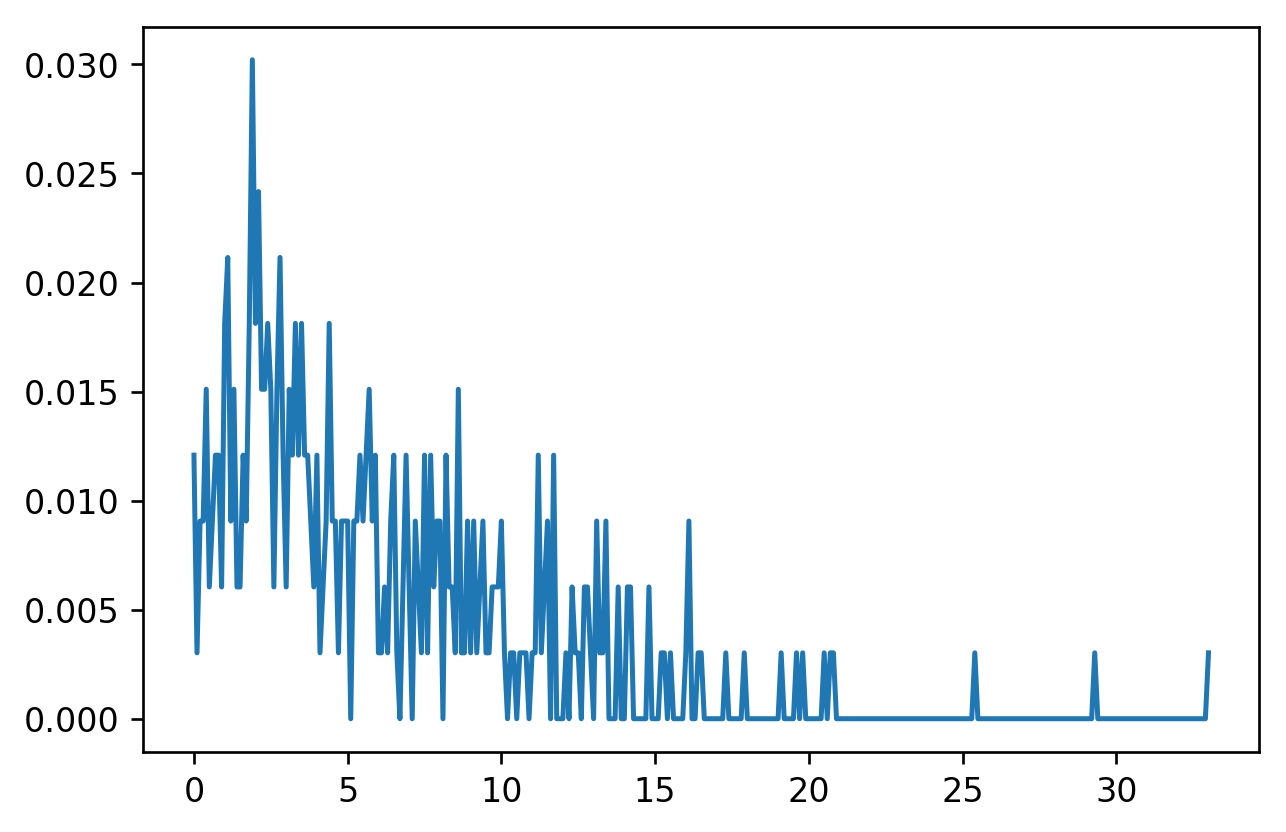

0.0302114803625
1.9


In [62]:
# round diff two days | multiple by 10 and parse Int
round_diff = [int(x*10) for x in diff]
range_diff = list(range(max(round_diff) + 1)) # x - axis: 0 -> max
distribution_diff = numpy.zeros(len(range_diff))
for i in round_diff:
    distribution_diff[i] += 1
distribution_diff = [x / len(distribution_diff) for x in distribution_diff]
range_diff = [x / 10 for x in range_diff]
plt.figure(dpi=240)
plt.plot(range_diff, distribution_diff)
plt.show()
print(max(distribution_diff))
print(range_diff[distribution_diff.index(max(distribution_diff))])

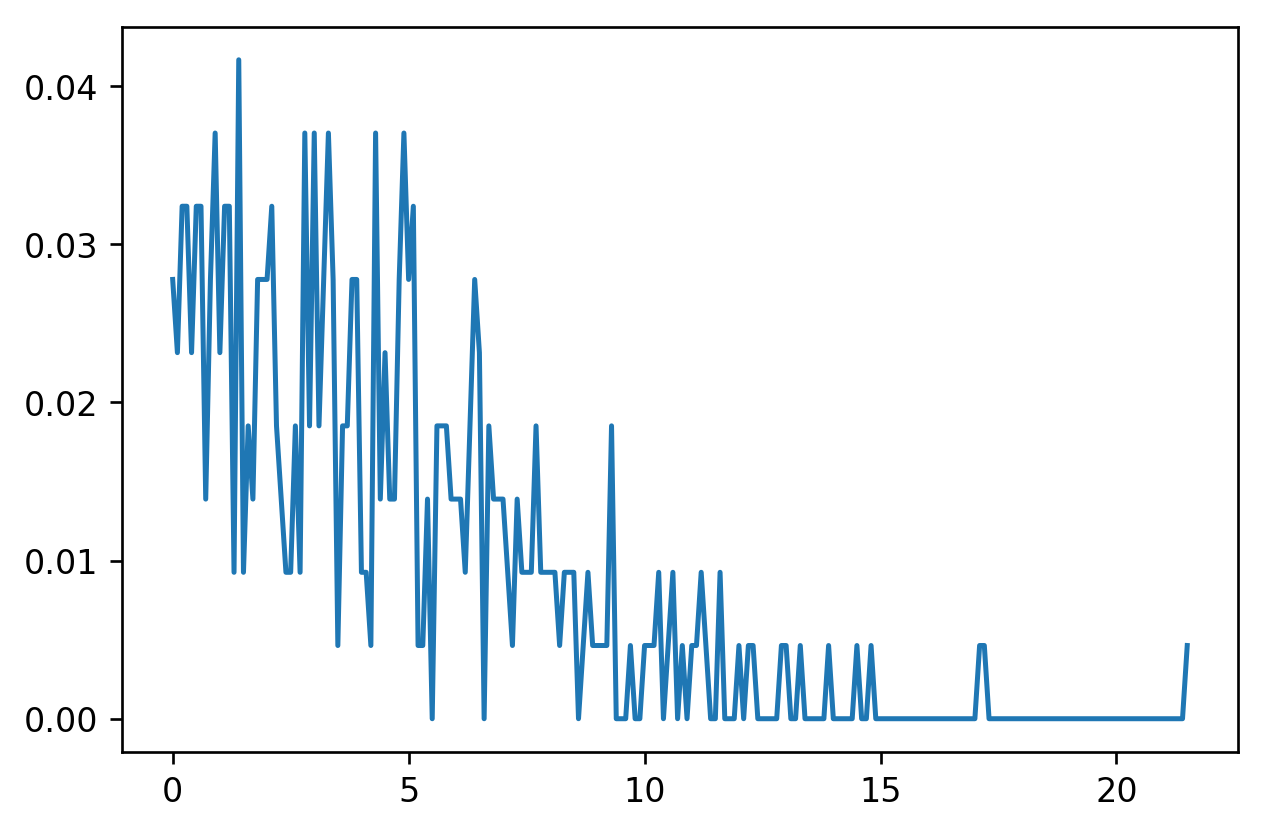

In [37]:
# round error | multiple by 10 and parse Int
round_error = [int(x*10) for x in error]
range_error = list(range(max(round_error) + 1)) # x - axis: 0 -> max
distribution_error = numpy.zeros(len(range_error))
for i in round_error:
    distribution_error[i] += 1
distribution_error = [x / len(distribution_error) for x in distribution_error]
range_error = [x / 10 for x in range_error]
plt.figure(dpi=240)
plt.plot(range_error, distribution_error)
plt.show()